# Data Preprocessing and EDA for the Churn Prediction model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Load and Prepare the Data

In [ ]:
df = pd.read_csv("data/BankChurners.csv")
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [68]:
df["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

## Data Description

- **CLIENTNUM** `(int64)` – Unique customer ID  
- **Attrition_Flag** `(object)` – Customer status (`True` = Churned, `False` = Existing)  
- **Customer_Age** `(int64)` – Age of the customer  
- **Gender** `(object)` – Gender of the customer  
- **Dependent_count** `(int64)` – Number of dependents  
- **Education_Level** `(object)` – Highest education level attained  
- **Marital_Status** `(object)` – Marital status (e.g., Married, Single)  
- **Income_Category** `(object)` – Income range (e.g., <$40K, $60K–$80K)  
- **Card_Category** `(object)` – Type of card (Blue, Silver, Gold, Platinum)  
- **Months_on_book** `(int64)` – Tenure in months (how long they've been a customer)  
- **Total_Relationship_Count** `(int64)` – Number of products/accounts with the bank  
- **Months_Inactive_12_mon** `(int64)` – Inactive months in the past year  
- **Contacts_Count_12_mon** `(int64)` – Customer service contacts in the past year  
- **Credit_Limit** `(float64)` – Total credit limit assigned  
- **Total_Revolving_Bal** `(int64)` – Total unpaid credit balance (revolving balance)  
- **Avg_Open_To_Buy** `(float64)` – Available credit = Credit limit - balance  
- **Total_Amt_Chng_Q4_Q1** `(float64)` – Change in amount spent from Q1 to Q4  
- **Total_Trans_Amt** `(int64)` – Total amount spent in the year  
- **Total_Trans_Ct** `(int64)` – Total number of transactions in the year  
- **Total_Ct_Chng_Q4_Q1** `(float64)` – Change in transaction count from Q1 to Q4  
- **Avg_Utilization_Ratio** `(float64)` – Average credit utilization (used credit ÷ credit limit)


In [ ]:
df.shape

(10127, 21)

In [50]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Sanity Check - Missing Values / Duplicate rows

In [42]:
print(df.isnull().sum())

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [ ]:
# Check for duplicates in the Pandas DataFrame
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows in the dataset: {len(duplicate_rows)}")
print(duplicate_rows)

Number of duplicate rows in the dataset: 0
Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]


# Handling Missing Values

## Categorical Feature
- Mostly mode imputation
- Find correlation between features
  - If correlated: Predictive modeling strategies
  - If non-correlated: Mode imputation

## Numerical Feature
- Correlated:
  - Regression or KNN imputer
- Non-correlated:
  - Normal distribution: Mean imputation
  - Skewed distribution: Median or Mode imputation



### EDA - to build a better classification model

1. Class imbalance - Check
2. Univariate Analysis - check skew and outliers
3. Bivariate Analysis - to check redundant features

In [71]:
# Create a binary 'churn' column where 1 = Attrited Customer, 0 = Existing Customer
df['churn'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

# Show the distribution to confirm
df['churn'].value_counts()

churn
0    8500
1    1627
Name: count, dtype: int64

### Univariate Analysis

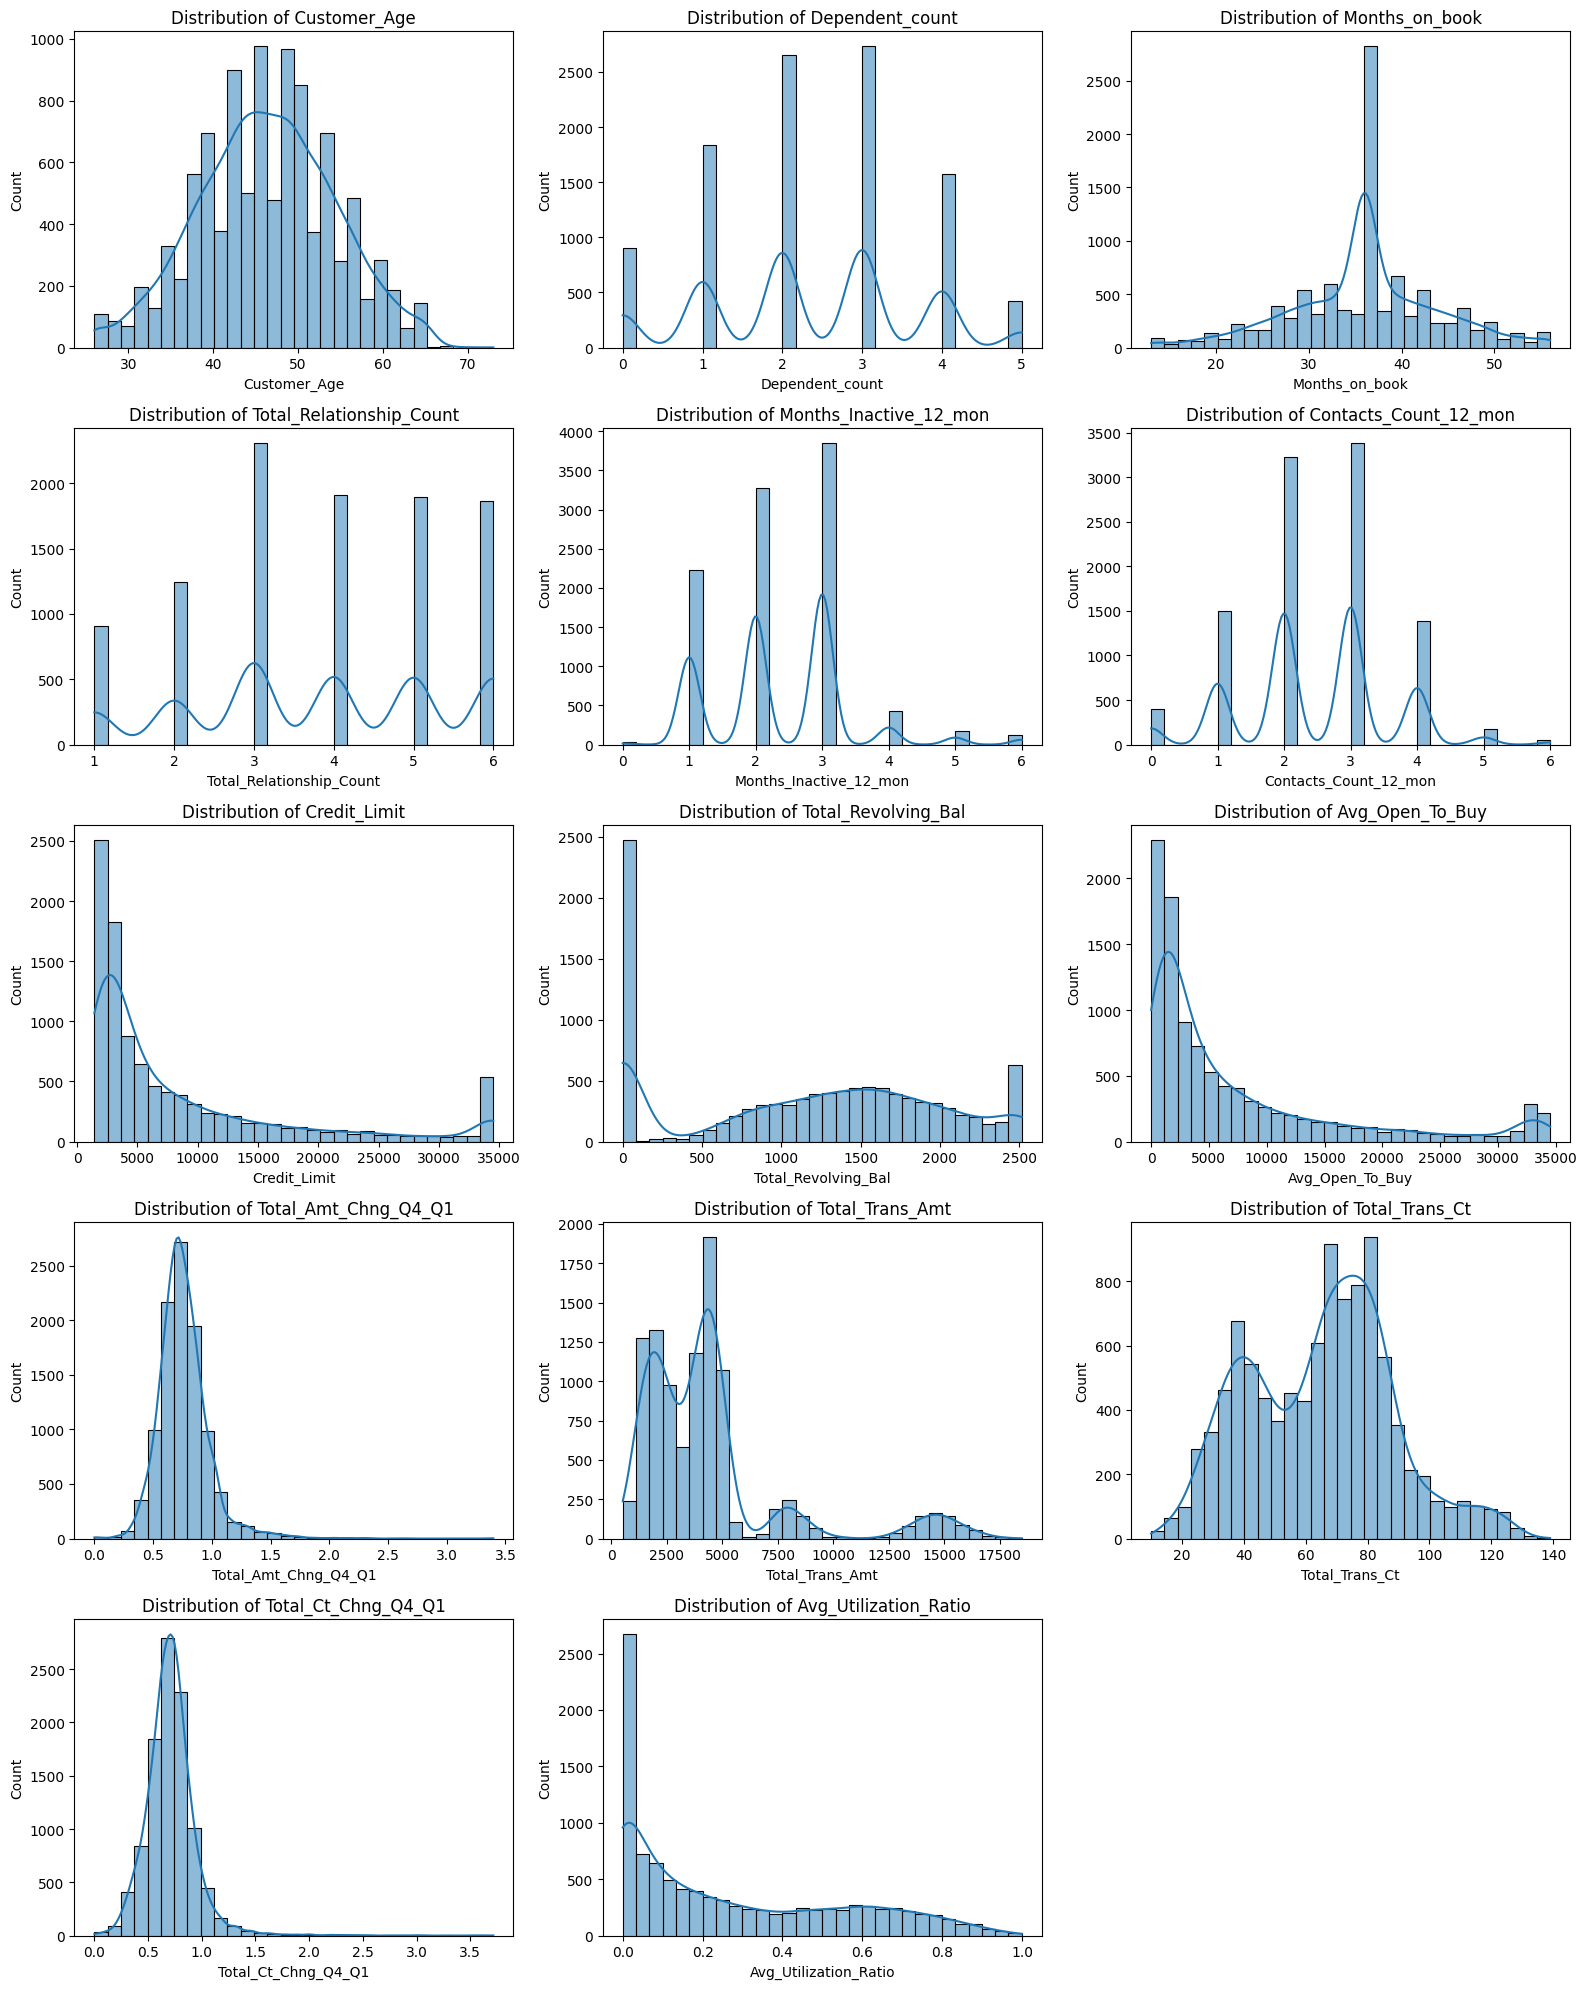

In [69]:
import seaborn as sns
# Identify numerical columns (excluding ID columns)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['CLIENTNUM']]  # exclude ID

# Create univariate distribution plots for each numeric feature
num_plots = len(numeric_cols)
n_cols = 3
n_rows = (num_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty plots if any
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


##  Univariate Analysis Summary 

### Customer_Age
- Age is fairly evenly distributed, with an average around 46.
- Most customers fall between 40–55 years old.
- No transformation needed.

### Dependent_count
- Majority have 1–3 dependents, very few have 4 or 5.
- No transformation needed.

### Months_on_book
- Average tenure is 36 months.
- Noticeable spike at exactly 36 months — could indicate:
  - A data artifact (default value), or
  - A real marketing campaign or product launch.
- ⚠️ Slight right skew — consider log transformation.
- Create a new feature: `joined_during_campaign = Months_on_book == 36`

### Total_Relationship_Count
- Discrete feature: most customers have 3–5 products.
- Consider grouping:
  - Low (≤2 products)
  - Medium (exactly 3)
  - High (>3)
- Useful for segment-level analysis.

### Months_Inactive_12_mon
- Many were inactive for exactly 3 months last year.
- Segment to capture behavior:
  - 0 → Active
  - 1–3 → Mildly inactive
  - >3 → Highly inactive
- Use ordinal encoding.

### Contacts_Count_12_mon
- Most contacted customer service 2–3 times.
- Suggested bins:
  - 0 → No contact
  - 1 → Mild contact
  - 2–3 → Regular contact
  - >3 → High contact = potential churn signal
- Use ordinal encoding.

### Credit_Limit
- Right-skewed — high-end outliers.
- Log transformation recommended.

### Total_Revolving_Bal
- Most carry a balance < $2,000; many have $0.
- Create binary feature: `has_revolving_balance = Total_Revolving_Bal > 0`

### Avg_Open_To_Buy
- Strong right skew — most have limited available credit.
- Log transformation recommended.

### Total_Trans_Amt
- Skewed right — typical spend is < $5K, some spend > $18K.
- Log transformation recommended.

### Total_Trans_Ct
- Ranges 10–139, average ~65.
- Multi-modal — suggests usage tiers.
- Use as-is or bin into `Low`, `Medium`, `High`.

### Avg_Utilization_Ratio
- Most use <50% of credit limit; some near 100%.
- Log transformation recommended.


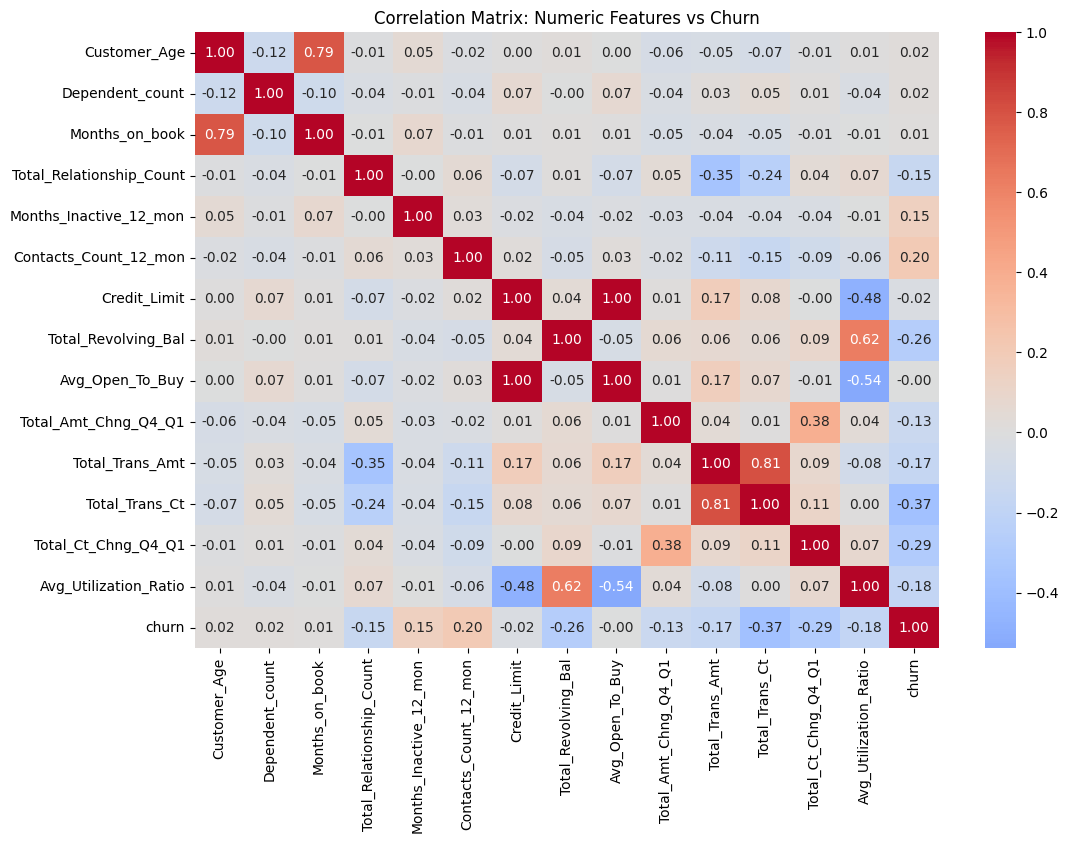

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric features
correlation_matrix = df[numeric_cols + ['churn']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix: Numeric Features vs Churn")
plt.show()


### Transformation based on the insights from EDA

In [74]:
import pandas as pd
import numpy as np

# Copy original DataFrame to preserve
df_transformed = df.copy()

# 1. Log transform skewed features
skewed_cols = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']
for col in skewed_cols:
    df_transformed[f'log_{col}'] = np.log1p(df_transformed[col])

# 2. Binary feature for Total_Revolving_Bal
df_transformed['has_revolving_balance'] = (df_transformed['Total_Revolving_Bal'] > 0).astype(int)

# 3. Campaign indicator based on spike in Months_on_book
df_transformed['joined_during_campaign'] = (df_transformed['Months_on_book'] == 36).astype(int)

# 4. Total_Relationship_Count binning
df_transformed['relationship_bin'] = pd.cut(
    df_transformed['Total_Relationship_Count'],
    bins=[0, 2, 3, df_transformed['Total_Relationship_Count'].max()],
    labels=['low', 'medium', 'high']
)

# 5. Months_Inactive_12_mon bins (ordinal)
df_transformed['inactivity_level'] = pd.cut(
    df_transformed['Months_Inactive_12_mon'],
    bins=[-1, 0, 3, df_transformed['Months_Inactive_12_mon'].max()],
    labels=[0, 1, 2]
).astype(int)

# 6. Contacts_Count_12_mon bins (ordinal)
df_transformed['contact_level'] = pd.cut(
    df_transformed['Contacts_Count_12_mon'],
    bins=[-1, 0, 1, 3, df_transformed['Contacts_Count_12_mon'].max()],
    labels=[0, 1, 2, 3]
).astype(int)

# 7. Total_Trans_Ct bins
df_transformed['txn_band'] = pd.cut(
    df_transformed['Total_Trans_Ct'],
    bins=[-1, 40, 70, df_transformed['Total_Trans_Ct'].max()],
    labels=['low', 'medium', 'high']
)

In [79]:
df_final = df_transformed[[ 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book'
       , 'Total_Revolving_Bal'
       ,  'Total_Trans_Amt',
       'Total_Trans_Ct',
       'churn', 'log_Credit_Limit', 'log_Avg_Open_To_Buy',
       'log_Total_Trans_Amt', 'log_Avg_Utilization_Ratio',
       'has_revolving_balance', 'joined_during_campaign', 'relationship_bin',
       'inactivity_level', 'contact_level', 'txn_band']]

In [80]:
df_final.head(3)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Revolving_Bal,Total_Trans_Amt,...,log_Credit_Limit,log_Avg_Open_To_Buy,log_Total_Trans_Amt,log_Avg_Utilization_Ratio,has_revolving_balance,joined_during_campaign,relationship_bin,inactivity_level,contact_level,txn_band
0,45,M,3,High School,Married,$60K - $80K,Blue,39,777,1144,...,9.448727,9.385553,7.043160,0.059212,1,0,high,1,2,medium
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,864,1291,...,9.018817,8.908289,7.163947,0.099845,1,0,high,1,2,low
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,0,1887,...,8.137103,8.137103,7.543273,0.000000,0,1,high,1,0,low


In [81]:
df_final.to_csv("final_df.csv",index=False)